<a href="https://colab.research.google.com/github/jhowsilvaa/Airbnb_Data_analysis/blob/main/Airbnb_Data_Analysis_Geneva(_Switzerland).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <h2>Análise dos Dados do Airbnb - Genebra (Suiça) </h2>

---


O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.
<center>
<img src="https://img.icons8.com/color/512/airbnb.png" width='08%'>

</center>


**Neste *notebook*, iremos analisar os dados referentes à cidade Genebra, e ver quais insights podem ser extraídos a partir de dados brutos.**


<center>
<h1 > <img align="top" alt="Colaboratory logo" width="2.9%"  src="https://www.crwflags.com/fotw/images/c/ch-ge_f.gif"> <b>Conheça Genebra  <img align="top" alt="Colaboratory logo" width="2.9%"  src="https://www.crwflags.com/fotw/images/c/ch-ge_f.gif">
<h1>

<center>
<p>Considerada a <b>segunda maior cidade</b> da suíça e um dos centros financeiros mais importante do mundo, a Encantadora <b>Genebra</b> fica na área sul do Lago Léman, a charmosa metrópole tem sido apontada como um dos melhores destinos turísticos para visitar.</p>
</center>
<center>
<p>
Genebra é conhecida como a <b> capital da paz</b>, já que instituições como  a  Cruz Vermelha, a Organização Mundial da Saúde e a ONU residem na metropole. A cidade esconde uma cultura divertida e animada, com uma variedade de hotéis de luxo, uma forte presença gastronomica (com vários restaurantes estrelados) para explorar, além de um cenário artístico vibrante. 
</p>
<p>
A localização da cidade às margens do Lago de Genebra significa que você pode dar um mergulho relaxante com vista para o Jet d'Eau, ou velejar ou praticar esqui aquático, e a proximidade da cidade com as Montanhas Jura para uma verdadeira fuga da realidade.
Na margem esquerda da cidade , as desejáveis ​​áreas Colony e Colony-Bellerive têm os maiores valores de propriedade por suas vistas únicas para o lago e a montanha e casas contemporâneas, enquanto na margem direita Chambésy, Versoix e Grand-Saconnex são os mais populares.
</p>

</center>

👉 [Encontre lugares para ficar em Genebra no Airbnb](https://www.airbnb.com.br/a/stays/Geneva--Geneva--Switzerland)
👈


<img src="https://swissroboticsday.ch/wp-content/uploads/2018/05/Lausanne.jpeg" width='550px'>







##**Importação de dados** <img align="left" alt="Colaboratory logo" width="3.0%" src="https://cdn-icons-png.flaticon.com/512/2111/2111283.png">

In [ ]:
# importando os pacotes necessarios
from folium import Map, Marker, Popup, Figure, Icon, plugins
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from rich.panel import Panel
from rich import print
import seaborn as sns
from scipy.stats import variation 
%matplotlib inline




<p align="center"> 
Todos os dados usados aqui foram obtidos a partir do site <a href="http://insideairbnb.com/get-the-data.html">Inside Airbnb</a>
</p>
<p align="center"> 
<img align="center" alt="Colaboratory logo" width="20%" src="https://c.tenor.com/rsSIoLjds9UAAAAC/airbnb-door.gif">



<p align="center"> 
Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:
</p>
<p> 
<li align="center"><b>listings.csv</b> - Summary information and metrics for listings in Geneva (good for visualisations).</p>

Neste dataset que baixamos é a versão "resumida" do Airbnb, existe uma versão mais completa (`listings.csv.gz`).

In [ ]:
# importando a base de dados
df_geneve = pd.read_csv('http://data.insideairbnb.com/switzerland/geneva/geneva/2022-06-22/visualisations/listings.csv')


## **Dicionário de Variaveis** <img align="left" alt="Colaboratory logo" width="3.0%" src="https://img.icons8.com/external-tal-revivo-fresh-tal-revivo/512/external-airbnb-hassel-free-room-rental-service-logotype-logo-fresh-tal-revivo.png">

📕 Um guia interativo que fornece descrições conceituais de cada variável em nosso conjunto de dados.




In [ ]:
#@title Consulte o dicionário 👇
%%html
<!DOCTYPE html>
<html lang="en" dir="ltr">
  <head>
    <meta charset="UTF-8">
    <link rel="stylesheet" href="style.css">
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.2/css/all.:min.css"/>
     <meta name="viewport" content="width=device-width, initial-scale=1.0">
   </head>
<body>
  <div class="container">
    <input type="radio" name="dot" id="one">
    <input type="radio" name="dot" id="two">
    <input type="radio" name="dot" id="tree">
    <input type="radio" name="dot" id="four">
    <input type="radio" name="dot" id="five">
    <input type="radio" name="dot" id="six">



    <div class="main-card">
      <div class="cards">
        <div class="card">
         <div class="content">
           <div class="img">
            <img src="https://c.tenor.com/BAGbC68hRz8AAAAC/airbnb-globe.gif" alt="airbnb">
          </div>
           <div class="details">
             <h3 style='color:black;' >id</h3>
            <span>Numero de Indentificação do imovel.</span>
           </div>
         </div>
        </div>
        <div class="card">
         <div class="content">
           <div class="img">
              <img src="https://i.gifer.com/embedded/download/4Bsa.gif" alt="airbnb">
           </div>
           <div class="details">
             <h3 style='color:black;'>name</h3>
            <span>Nome da propriedade.</span>
           </div>
         </div>
        </div>
        <div class="card">
         <div class="content">
           <div class="img">
            <img src="https://i.pinimg.com/originals/9f/75/7f/9f757ffb3e2aaf3daa0d1eaf2268bd50.gif" alt="airbnb">
           </div>
           <div class="details">
              <h3 style='color:black;' >host_id</h3>
            <span>Numero de Indentificação do proprietário do imovel(anfitrião).</span>
           </div>
         </div>
        </div>
      </div>
      <div class="cards">
        <div class="card">
         <div class="content">
           <div class="img">
            <img src="https://media.itsnicethat.com/original_images/563b97a87fa44cff9d001760.gif" alt="airbnb">
           </div>
           <div class="details">
             <h3 style='color:black;' >host_name</h3>
            <span>Nome do proprietário do imovel(anfitrião).</span>
           </div>
         </div>
        </div>
        <div class="card">
         <div class="content">
           <div class="img">
            <img src="https://www.gizmodo.com.au/wp-content/uploads/sites/2/2016/09/09/cnfjdlbjzjdzhea3q8q5.gif" alt="airbnb.">
           </div>
           <div class="details">
             <h3 style='color:black;'>neighbourhood_group</h3>
            <span>Não contém nenhum valor valido(dados ausentes).</span>
           </div>
         </div>
        </div>
        <div class="card">
         <div class="content">
           <div class="img">
            <img src="https://i.gifer.com/94WF.gif" alt="airbnb.">
           </div>
           <div class="details">
              <h3 style='color:black;' >neighbourhood</h3>
            <span>Nome do Bairro.</span>
           </div>
         </div>
        </div>
      </div>
      
      <div class="cards">
        <div class="card">
         <div class="content">
           <div class="img">
            <img src="https://cdn.dribbble.com/users/97602/screenshots/2337410/one_man_band.gif" alt="airbnb">
          </div>
           <div class="details">
             <h3 style='color:black;' >latitude</h3>
            <span>coordenada da latitude da propriedade.</span>
           </div>
         </div>
        </div>
        <div class="card">
         <div class="content">
           <div class="img">  
                <img src="https://freight.cargo.site/t/original/i/4023ad65cfeb26b9c2dea6d154dd39531b2b102007a344c1cb4c467cf73676c9/1.gif" alt="airbnb">
           </div>
           <div class="details">
             <h3 style='color:black;'>longitude</h3>
            <span>coordenada da longitude da propriedade.</span>
           </div>
         </div>
        </div>
        <div class="card">
         <div class="content">
           <div class="img">
               <img src="https://freight.cargo.site/t/original/i/94d9ed5cb0cbeb35e96d16b491e3aaff791253b00e4518406fcacb9c10dec9f9/4.gif" alt="airbnb">
           </div>
           <div class="details">
              <h3 style='color:black;' >room_type</h3>
            <span>O tipo de quarto.</span>
           </div>
         </div>
        </div>
      </div>
      <div class="cards">
        <div class="card">
         <div class="content">
           <div class="img">
                <img src="https://i.pinimg.com/originals/01/db/ee/01dbee81a7d4b7678c08bd53b16a18b4.gif" alt="airbnb">
           </div>
           <div class="details">
             <h3 style='color:black;' >price</h3>
            <span>preço para alugar o imóvel.</span>
           </div>
         </div>
        </div>
        <div class="card">
         <div class="content">
           <div class="img">
                <img src="https://etapes.com/app/uploads/2015/11/1446805788.gif" alt="airbnb">
           </div>
           <div class="details">
             <h3 style='color:black;'>minimum_nights</h3>
            <span>O número mínimo de noites que um hóspede pode reservar seu aluguel de temporada.</span>
           </div>
         </div>
        </div>
        <div class="card">
         <div class="content">
           <div class="img">
               <img src="https://i.pinimg.com/originals/99/86/9d/99869df9eb48204eeaf26ff49cbc72fe.gif" alt="airbnb">
           </div>
           <div class="details">
              <h3 style='color:black;'>number_of_reviews</h3>
            <span>Número de Reviews da propriedade.</span>
           </div>
         </div>
        </div>
      </div>
      <div class="cards">
        <div class="card">
         <div class="content">
           <div class="img">
             <img src="https://mir-s3-cdn-cf.behance.net/project_modules/fs/81474438433363.576176f7e65ee.gif" alt="airbnb">
           </div>
           <div class="details">
             <h3 style='color:black;'>last_review</h3>
            <span>Data da Ultima Review.</span>
           </div>
         </div>
        </div>
        <div class="card">
         <div class="content">
           <div class="img">
                <img src="https://cdn.dribbble.com/users/1937292/screenshots/6962478/video-1565151647.gif" alt="airbnb">
           </div>
           <div class="details">
             <h3 style='color:black;'>reviews_per_month</h3>
            <span>Quantidade de Reviews por mês.</span>
           </div>
         </div>
        </div>
        <div class="card">
         <div class="content">
           <div class="img">
               <img src="https://news.airbnb.com/wp-content/uploads/sites/4/2018/07/gif-n3_airbnb_1200.gif" alt="airbnb">
           </div>
           <div class="details">
              <h3 style='color:black;'>calculated host listings count</h3>
            <span>Quantidade de imóveis do mesmo anfitrião.</span>
           </div>
         </div>
        </div>
      </div>
      <div class="cards">
        <div class="card">
         <div class="content">
           <div class="img">
              <img src="https://cdn.dribbble.com/users/500242/screenshots/3834025/airbnb-dribbble2.gif" alt="airbnb">
           </div>
           <div class="details">
             <h3 style='color:black;' >availability_365</h3>
            <span>Indicador do número total de dias em que o anúncio está disponível durante o ano.</span>
           </div>
         </div>
        </div>
        <div class="card">
         <div class="content">
           <div class="img">
            <img src="https://i.pinimg.com/originals/46/5b/c4/465bc4bc137942ccd0a2a8ecb96387e8.gif" alt="airbnb">
           </div>
           <div class="details">
              <h3 style='color:black;'>number_of_reviews_ltm</h3>
            <span>Numero de Reviews dos últimos Doze Meses.</span>
           </div>
         </div>
        </div>
        <div class="card">
         <div class="content">
           <div class="img">
              <img src="https://i.pinimg.com/originals/a3/cd/30/a3cd30c0ba0e7f827dfe22e7a7011cd8.gif" alt="airbnb">

           </div>
           <div class="details">
              <h3 style='color:black;'>license</h3>
            <span>Número da apólice da propriedade.</span>
           </div>
         </div>
        </div>
      </div>
    </div>
    <div class="button">
      <label for="one" class=" active one"></label>
      <label for="two" class="two"></label>
      <label for="tree" class="tree"></label>
      <label for="four" class="four"></label>
      <label for="five" class="five"></label>
      <label for="six" class="six"></label>

    </div>
  </div>
</body>
</html>
<style>
    @import url('https://fonts.googleapis.com/css2?family=Poppins:wght@200;300;400;500;600;700&display=swap');
*{
    margin: 0;
    padding: 0;
    box-sizing: border-box;
    font-family: "Poppins", sans-serif;
}
body{
  display: flex;
  justify-content: start;
  align-items: center;
  color: #434343;

  font-size: 16px
}
::selection{
  background:   #FF676D;
  color: #fff;
}
.container{
  max-width: 850px;
  width: 100%;
  overflow: hidden;
  padding: 15px 0;

}
.container .main-card{
  display: flex;
  justify-content: space-evenly;
  width: 600%;
  transition: 1s;

}
#two:checked ~ .main-card{
  margin-left: -100%;
}
#tree:checked ~ .main-card{
  margin-left: -200%;
}
#four:checked ~ .main-card{
  margin-left: -300%;
}
#five:checked ~ .main-card{
  margin-left: -400%;
}
#six:checked ~ .main-card{
  margin-left: -500%;
}
.container .main-card .cards{
  width: calc(100% / 3 - 10px);
  display: flex;
  flex-wrap: wrap;
  margin: 0 20px;
  justify-content: space-between;

}
.main-card .cards .card{
  width: calc(100% / 3 - 10px);
  background: #fff;
  border-radius: 12px;
  padding: 30px;
  box-shadow: 0 5px 10px rgba(0, 0, 0, 0.25);
  transition: all 0.4s ease;
  box-shadow: 20px 20px 50px -30px red;


}
.main-card .cards .card:hover{
  transform: translateY(-15px);
}
.cards .card .content{
  width: 100%;
  display: flex;
  flex-direction: column;
  justify-content: center;
  align-items: center;
  text-align: center;


}
.cards .card .content .img{
  width: 7em;
  height: 7em;
  border-radius: 50%;
  border: 5px solid red;
  padding: 0px;
  margin-bottom: 2em;
}
.card .content .img img{
  height: 100%;
  width: 100%;
  border: 3px solid #ffff;
  border-radius: 50%;
  object-fit: cover;
}



.container .button{
  width: 100%;
  display: flex;
  justify-content: center;
  margin: 20px;
}
.button label{
  height: 15px;
  width: 15px;
  border-radius: 20px;
  background: #fff;
  margin: 0 4px;
  cursor: pointer;
  transition: all 0.5s ease;
}
h3 {
    font-size: 100%;
    margin: 16px 0;
}
.button label.active{
  width: 35px;
}
#one:checked ~ .button .one{
  width: 35px;
}
#one:checked ~ .button .two{
  width: 15px;
}
#two:checked ~ .button .one{
  width: 15px;
}
#two:checked ~ .button .two{
  width: 35px;
}
#tree:checked ~ .button .two{
  width: 15px;
}
#tree:checked ~ .button .one{
  width: 15px;
}
#tree:checked ~ .button .tree{
  width: 35px;
}
#four:checked ~ .button .one{
  width: 15px;
}
#four:checked ~ .button .tree{
  width: 15px;
}
#four:checked ~ .button .four{
  width: 35px;
}
#five:checked ~ .button .four{
  width: 15px;
}
#five:checked ~ .button .one{
  width: 15px;
}
#five:checked ~ .button .five{
  width: 35px;
}
#six:checked ~ .button .five{
  width: 15px;
}
#six:checked ~ .button .one{
  width: 15px;
}
#six:checked ~ .button .six{
  width: 35px;
}
input[type="radio"]{
  display: none;
}
@media (max-width: 768px) {
  .main-card .cards .card{
    margin: 20px 0 10px 0;
    width: calc(100% / 2 - 10px);
  }
}
@media (max-width: 720px) {
  .main-card .cards .card{
    margin: 5px 0 5px 0;
    width: 30%;
    flex-direction: column;

  }
}

</style>

## **nálise dos Dados** <img align="left" alt="Colaboratory logo" width="3.0%" src="https://cdn2.iconfinder.com/data/icons/ios-14-custom-application/62/application-22-256.png">

💹 Esta etapa tem por objetivo permitir um entendimento de como os dados estão estruturados.

* Antes de iniciar a análise dos dados, vamos verificar o nosso *dataset*, analisando as 5 primeiras entradas.


In [ ]:
df_geneve.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,42515,Geneva center - Hosting females,185647,Noelle,NaN,Commune de Genève,46.20140,6.15507,Private room,79,3,63,2022-05-28,0.48,1,355,5,NaN
1,44959,Perfect Cozy Bedroom Close to Lake & Transport,198343,Rita,NaN,Commune de Genève,46.19704,6.16076,Private room,59,1,49,2020-04-03,0.34,1,0,0,NaN
2,276025,Lovely flat by Geneva lake,1442438,Gaby,NaN,Versoix,46.27944,6.16724,Entire home/apt,70,7,110,2022-05-28,0.88,1,234,3,NaN
3,325986,"Stylish loft in Pâquis, next to UN",1667362,Virna,NaN,Commune de Genève,46.21428,6.14610,Entire home/apt,150,7,108,2021-11-10,0.88,2,192,4,NaN
4,338682,Top location 1 block from the lake!,1001280,Mike,NaN,Commune de Genève,46.20682,6.15526,Entire home/apt,157,5,104,2022-03-13,0.83,1,52,9,NaN


###**1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui ❓ Quais os tipos das variáveis ❓**

* Vamos dar uma olhada em quantos registros nosso conjunto de dados possui e e observar o tipo de cada coluna.

In [ ]:
#@title **Visualize as informações no card 👇**

print(Panel(f'''
[bright_white]Entradas: {df_geneve.shape[0]}
Variaveis:[bright_white] {df_geneve.shape[1]}[/]

[bright_white]{df_geneve.dtypes}[/]''', 
expand=False, style='deep_pink2  on grey11', 
title='[bright_white]Tipo de Variaveis[/]'))


╭──────────── Tipo de Variaveis ────────────╮
│                                           │
│ Entradas: 3223                            │
│ Variaveis: 18                             │
│                                           │
│ id                                  int64 │
│ name                               object │
│ host_id                             int64 │
│ host_name                          object │
│ neighbourhood_group               float64 │
│ neighbourhood                      object │
│ latitude                          float64 │
│ longitude                         float64 │
│ room_type                          object │
│ price                               int64 │
│ minimum_nights                      int64 │
│ number_of_reviews                   int64 │
│ last_review                        object │
│ reviews_per_month                 float64 │
│ calculated_host_listings_count      int64 │
│ availability_365                    int64 │
│ number_of_reviews_ltm               int64 │
│ license                            object │
│ dtype: object                             │
╰───────────────────────────────────────────╯

###  **2. Qual a porcentagem de valores ausentes no dataset ❓**  



<p> A quantidade de Valores ausentes está associada a qualidade de um dataset,<p> é 
essencial entender se esses valores nulos são importantes comparados ao total de entradas.
<br><br>

* É possível constatar que a coluna `neighbourhood_group` possui 100% dos seus valores nulos.
 
* Bem próximo dos 100% temos a coluna `license` que possui 98% dos dados nulos.

* As colunas `reviews_per_month` e `last_review` apresentam aproximadamente 20% dos dados nulos.

In [ ]:
#@title **Visualize as informações no card 👇**


df_null = np.divide(df_geneve.isnull().sum(), len(df_geneve))*100

print(Panel(f'''
[bright_white]{df_null.sort_values(ascending=False).round(2)}[/]''', 
            style='salmon1 on grey11', 
            expand=False, 
            title='[bright_white]% de dados ausentes'
            ))

╭────────── % de dados ausentes ───────────╮
│                                          │
│ neighbourhood_group               100.00 │
│ license                            98.63 │
│ reviews_per_month                  20.35 │
│ last_review                        20.35 │
│ minimum_nights                      0.00 │
│ number_of_reviews_ltm               0.00 │
│ availability_365                    0.00 │
│ calculated_host_listings_count      0.00 │
│ number_of_reviews                   0.00 │
│ id                                  0.00 │
│ name                                0.00 │
│ room_type                           0.00 │
│ longitude                           0.00 │
│ latitude                            0.00 │
│ neighbourhood                       0.00 │
│ host_name                           0.00 │
│ host_id                             0.00 │
│ price                               0.00 │
│ dtype: float64                           │
╰──────────────────────────────────────────╯

  ### **3. Qual o tipo de distribuição das variáveis ❓**



Em um conjunto de dados é importante descrever o comportamento de como os valores estão distribuídos,
<br>usaremos o histograma para identificar a distribuição das variáveis numéricas.

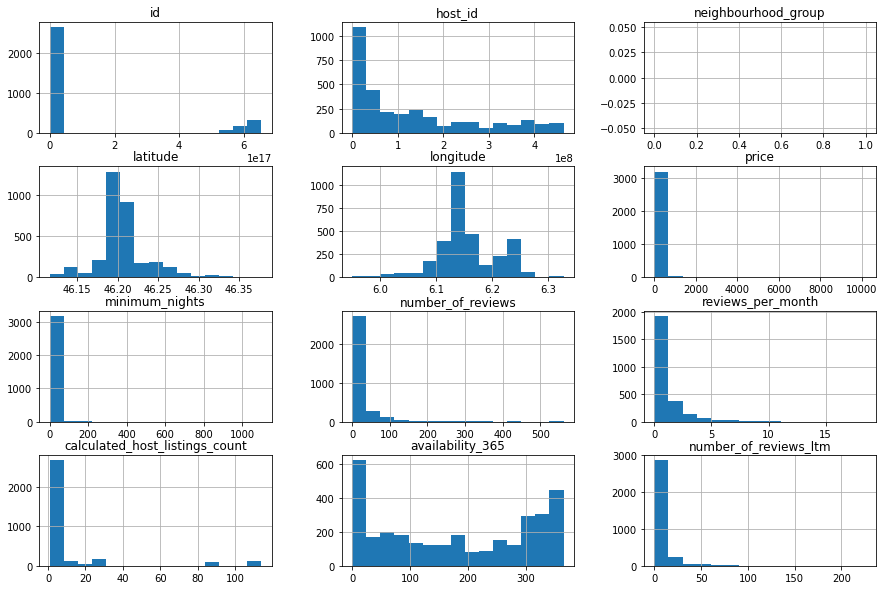

In [ ]:
df_geneve.hist(bins=15, figsize=(15,10));

### **4. Há *outliers* presentes❓**


Analisando a distribuição dos nossos dados, é possível constatar alguns vislumbres de outlier, verifique, por exemplo, as variáveis `Price`, `minimum_nights` e `calculated_host_listings_count`.

Utilizaremos dois métodos para identificar outliers:

* Através de um resumo estatístico `Describe()` conseguimos explorar a tendência central, a dispersão e a forma da distribuição de um conjunto de dados, excluindo `NaN` valores.

* Plotar um `boxplot` para cada variável numérica.





In [ ]:
df_geneve.describe().iloc[:, 5:]

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3223.000000,3223.000000,3223.000000,2567.000000,3223.000000,3223.000000,3223.000000
mean,127.295067,6.641018,22.085014,1.033272,10.057400,179.423208,5.920571
std,225.426269,25.729962,47.625598,1.393001,24.742776,131.478614,11.798295
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,65.000000,1.000000,1.000000,0.220000,1.000000,50.000000,0.000000
50%,92.000000,2.000000,6.000000,0.570000,1.000000,172.000000,1.000000
75%,135.500000,5.000000,22.000000,1.230000,4.000000,312.000000,7.000000
max,10184.000000,1100.000000,562.000000,18.510000,114.000000,365.000000,226.000000


Com o resumo estatístico acima, podemos validar algumas hipóteses como:

* Na coluna `minimum_night` o numero maximo de noites minimas é de ***1100***, um valor que esta claramente acima de 365 dias no ano. 

* Em `price`, averiguamos que 75% do valor está abaixo de **135**, porém temos um registro do valor máximo que é **10184**

* O desvio Padrão para todas as Variáveis apresenta-se com um valor alto em relação à média, isso é um grande indicativo de que existem valores estão muito distantes do centro, sustentando a hipótese da presença de outliers.

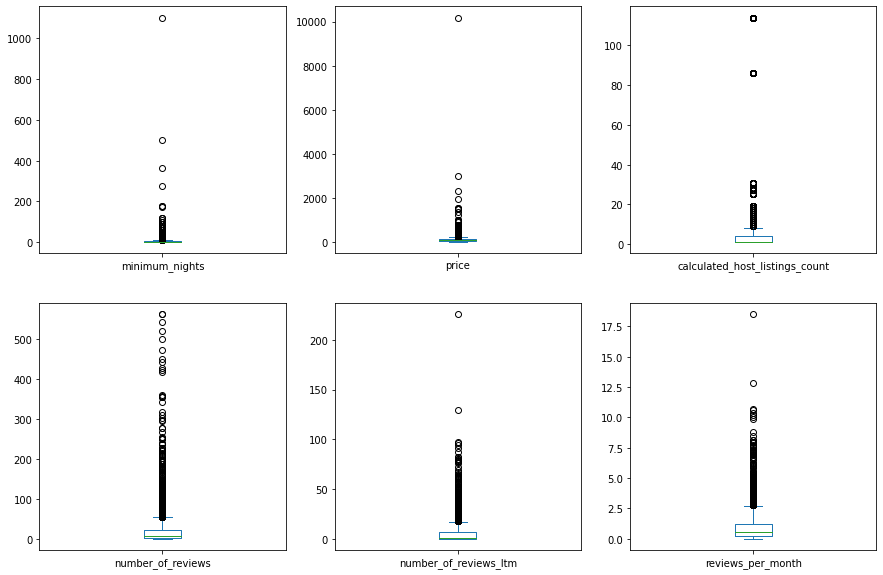

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,16))
df_geneve.minimum_nights.plot(kind='box', figsize=(15, 10), ax=ax[0,0])
df_geneve.price.plot(kind='box', figsize=(15, 10), ax=ax[0,1])
df_geneve.calculated_host_listings_count.plot(kind='box', figsize=(15, 12), ax=ax[0,2])
df_geneve.number_of_reviews.plot(kind='box', figsize=(15, 10), ax=ax[1,0])
df_geneve.number_of_reviews_ltm.plot(kind='box', figsize=(15, 10), ax=ax[1,1])
df_geneve.reviews_per_month.plot(kind='box', figsize=(15, 10), ax=ax[1,2])
plt.show()


Verificando os Boxplots, conseguimos ver claramente que temos outliers presentes. Para tratá-los vamos seguir os seguintes passos:

* Definir o Q1 e Q3 para as variáveis que serão limpas.
* Calcular o IQR para as variáveis.
* Definir o limite superior e inferior para cortar os outliers.
* Remover os outliers.


#### Identificando os outliers (`price`)

In [ ]:
# identificando os outliers para a variável price
q1_price = df_geneve.price.quantile(.25)
q3_price = df_geneve.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites                                       
sup_price = q3_price + (1.5 * IQR_price)
inf_price = q1_price - (1.5 * IQR_price)

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da variável price:  70.5

Limite superior de price:  241.25

Limite inferior de price:  -40.75

Abaixo, é possível observar que mesmo não havendo outliers na parte inferior, ainda temos valores iguais a zero que precisam ser tratados. Vamos traçar um boxplot para visualizar a diferença que a limpeza faz.

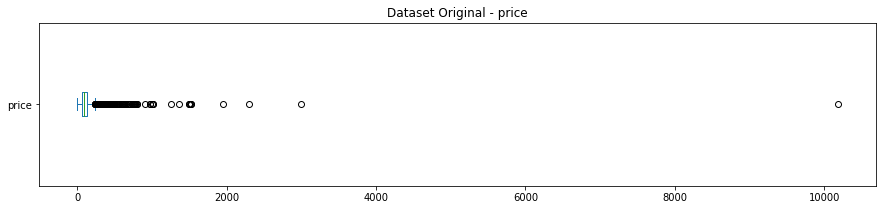

O dataset possui 3223 colunas

258 Entradas acima de 241

Representam 8.00% do dataset

In [ ]:
fig, ax = plt.subplots(figsize=(15,3))
df_geneve.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} colunas".format(df_geneve.shape[0]))
print("{} Entradas acima de 241".format(len(df_geneve[df_geneve.price > sup_price])))
print("Representam {:.2f}% do dataset".format((len(df_geneve[df_geneve.price > sup_price]) / df_geneve.shape[0])*100))

#### Identificando os outliers (`minimum_nights`)



In [ ]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df_geneve.minimum_nights.quantile(.25)
q3_minimum_nights = df_geneve.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + (1.5 * IQR_minimum_nights)
inf_minimum_nights = q1_minimum_nights - (1.5 * IQR_minimum_nights)

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  4.0

Limite superior de minimum_nights:  11.0

Limite inferior de minimum_nights:  -5.0

* Aqui obtemos o mesmo comportamento que observamos em price.

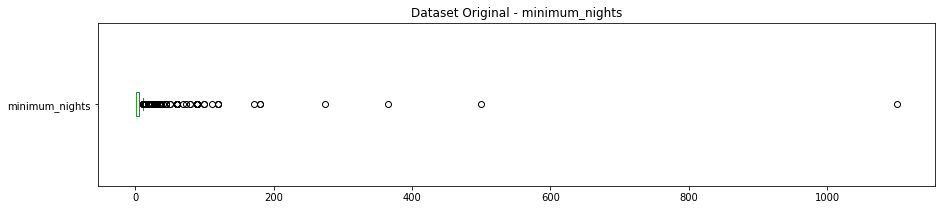

O dataset possui 3223 colunas

339 Entradas acima de 11

Representam 10.52% do dataset

In [ ]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df_geneve.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()
print("O dataset possui {} colunas".format(df_geneve.shape[0]))
print("{} Entradas acima de 11".format(len(df_geneve[df_geneve.minimum_nights > sup_minimum_nights ])))
print("Representam {:.2f}% do dataset".format((len(df_geneve[df_geneve.minimum_nights > sup_minimum_nights ]) / df_geneve.shape[0])*100))

#### Limpeza de dados

Agora que identificamos *outliers* nas variáveis ​​`price` e `minimum_nights`, vamos limpar os nossos dados e depois vou:

* Comparar os boxplots limpos com os originais

* Plotar novamente o histograma


In [ ]:
# limpando o dataset
df_clean = df_geneve.copy()

df_clean.drop(df_clean[df_clean.price > sup_price].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > sup_minimum_nights].index, axis=0, inplace=True)

In [ ]:
# verificando a distribuição estatística dos dados limpos
df_clean.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.647000e+03,2.647000e+03,0.0,2647.000000,2647.000000,2647.000000,2647.000000,2647.000000,2156.000000,2647.000000,2647.000000,2647.000000
mean,1.217023e+17,1.390192e+08,NaN,46.207046,6.155695,97.080468,2.843219,24.105025,1.133919,10.560635,176.131470,6.677748
std,2.430895e+17,1.392984e+08,NaN,0.032579,0.056219,45.318032,2.073839,50.356480,1.467362,25.872485,132.596197,12.627013
min,4.251500e+04,6.783700e+04,NaN,46.116390,5.950040,15.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.506949e+07,2.151552e+07,NaN,46.192520,6.128000,64.000000,1.000000,1.000000,0.260000,1.000000,44.500000,0.000000
50%,4.303330e+07,8.908735e+07,NaN,46.202320,6.146350,89.000000,2.000000,7.000000,0.675000,1.000000,172.000000,2.000000
75%,5.305440e+07,2.380028e+08,NaN,46.213155,6.196995,122.000000,4.000000,24.000000,1.382500,4.000000,311.000000,8.000000
max,6.541262e+17,4.643403e+08,NaN,46.377450,6.328190,240.000000,11.000000,562.000000,18.510000,114.000000,365.000000,226.000000


Perceba como fica visivel o resultado da nossa limpeza quando levamos em consideração os quartis do dado original.

Para ter certeza de que não estamos lidando com outliers que prejudicariam nossa análise, vamos verificar o histograma.

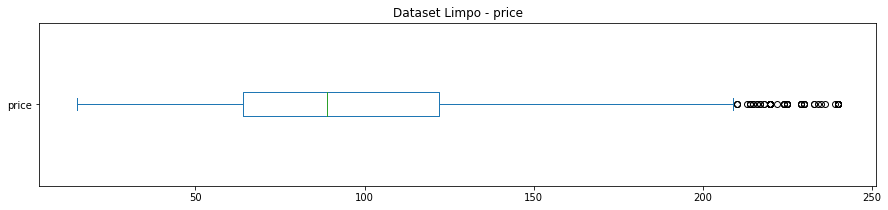

In [ ]:
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - price')
plt.show()

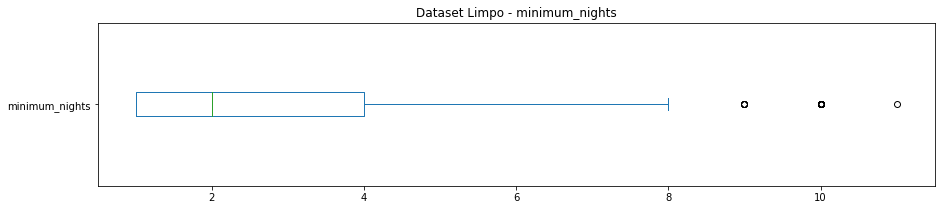

In [ ]:
fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - minimum_nights')
plt.show()

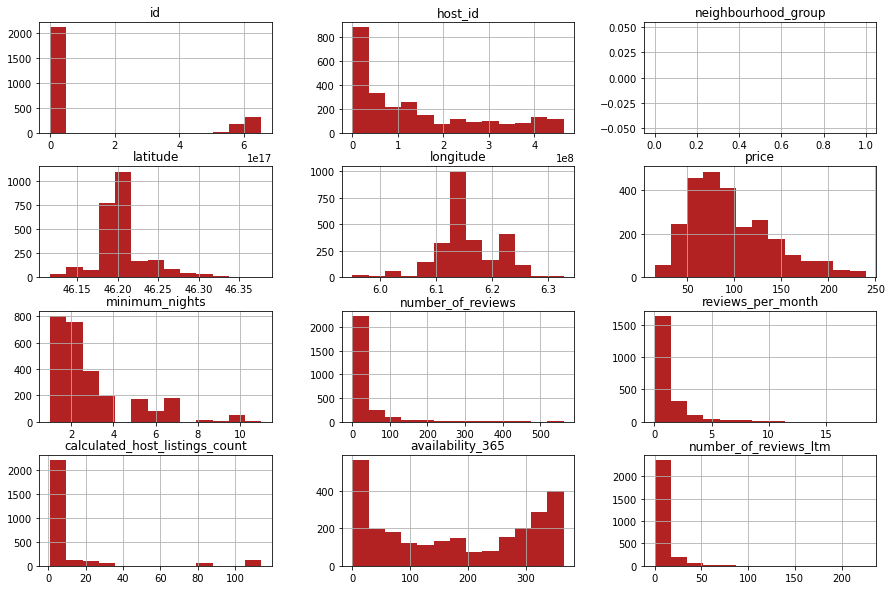

In [ ]:
df_clean.hist(bins='sturges', figsize=(15,10), color=['firebrick']);

### **5. Qual a correlação existente entre as variáveis❓**

A correlação descreve a direção e o grau de relação de duas ou mais variáveis.
Para determinar as correlações existentes entre as variáveis ​​de interesse, irei:

* Gerar uma matriz de correlação.

* Com a biblioteca `seaborn`, criar um heatmap utilizando a Matriz de correlação.

In [ ]:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365',]].corr() #matriz de correlação

corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.008451,-0.011879,-0.036003,0.023227,-0.071202
minimum_nights,-0.008451,1.000000,-0.126649,-0.260057,-0.114793,-0.072380
number_of_reviews,-0.011879,-0.126649,1.000000,0.472454,-0.081483,-0.052275
reviews_per_month,-0.036003,-0.260057,0.472454,1.000000,0.024115,0.087460
calculated_host_listings_count,0.023227,-0.114793,-0.081483,0.024115,1.000000,0.198101
availability_365,-0.071202,-0.072380,-0.052275,0.087460,0.198101,1.000000


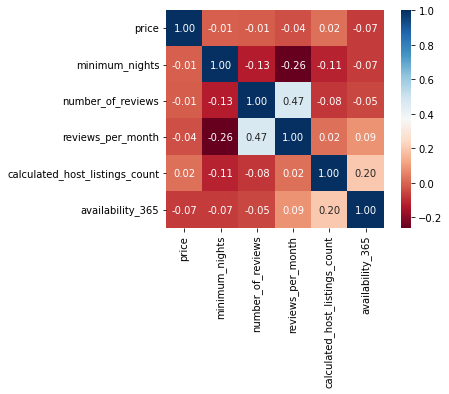

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

### **6. Qual o tipo de imóvel mais alugado no Airbnb❓**



Os anfitriões no Airbnb oferecem uma grande variedade de acomodações, desde apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas. Se você consultou a variável `room_type` em nosso dicionário de variáveis, sabe que ela indica o tipo de locação anunciada no Airbnb.

com o método `value_counts()` contaremos a quantidade de registro de cada tipo de aluguel.

In [ ]:
Room_type = df_clean.room_type.value_counts()
Room_type


Entire home/apt    1808
Private room        804
Hotel room           21
Shared room          14
Name: room_type, dtype: int64

In [ ]:
percen_room = np.divide(Room_type, len(df_geneve))*100
percen_room.round(2)

Entire home/apt    56.10
Private room       24.95
Hotel room          0.65
Shared room         0.43
Name: room_type, dtype: float64

### **7. Qual a localidade mais cara do dataset ❓**



Para comparar bairros (neighbourhoods) a partir do preço, 

utilizaremos o `groupby` que  envolve uma combinação de divisão do objeto, 

aplicação de uma função e combinação dos resultados.


In [ ]:
#@title **Visualize as informações no card 👇**
places_costly = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False).head(10)
places_costly

print(Panel(f'''
[bright_white]{places_costly}[/]''', 
            style='bright_cyan on grey11', 
            expand=False, 
            title='[bright_white]Preço médio de locação'
            ))

╭──── Preço médio de locação ─────╮
│                                 │
│ neighbourhood                   │
│ Avusy                152.000000 │
│ Cologny              143.888889 │
│ Hermance             140.833333 │
│ Chêne-Bougeries      121.500000 │
│ Russin               120.000000 │
│ Pregny-Chambésy      117.222222 │
│ Jussy                115.142857 │
│ Commune de Genève    114.357814 │
│ Grand-Saconnex       111.060000 │
│ Troinex              109.400000 │
│ Name: price, dtype: float64     │
╰─────────────────────────────────╯

Observando o card acima,Podemos ver que a região de  Avusy têm o preço médio mais altos do que lugares como Cologny , Pregny-Chambésy,
Chêne-Bougeries, Russin e Meinier.

De acordo com [o índice anual de situação financeira para o ano de 2021](https://www.ge.ch/document/fiscalite-communes-indice-annuel-capacite-financiere), publicado no [site oficial da república e do cantão de Genebra](https://www.ge.ch),o índice de situação financeira do assentamento de Avusy é inferior ao das outras regiões mencionadas acima. Enquanto todas as outras comunas do cantão genebrino fazem parte dos 25 municípios com maior capacidade financeira de Genebra, Avusy é um dos últimos lugares. É improvável que Colony e Avusy estejam na mesma agenda em termos de alto desempenho econômico, Colony lidera o ranking de capacidade financeira com um valor quase 3 vezes maior do que o 4º lugar (Vandoeuvres), sem falar que  a "Beverly Hills de Genebra", Conhecida assim por alguns, é o lar do Fórum Econômico Mundial (WEF), onde o engajamento e a colaboração entre as maiores e mais importantes empresas do mundo acontecem todos os anos. 

Podemos destacar também que a maioria das regiões do cantão de genebra apresentadas no card, são comunas limítrofes do lago Lemano(O maior lago da Europa Ocidental) e estabelecem uma proximidade geográfica com centro de genebra, o que torna essas regiões únicas.

Quando realizamos uma análise exploratória de dados é essencial fazer perguntas durante a investigação ou quando estamos tentando validar uma hipótese. Interpretar os dados sem questionamento é como legitimar que eles dizem qualquer coisa. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para Avusy.







In [ ]:
avusy = df_clean[df_clean.neighbourhood == 'Avusy']
print(f'Numero de Entradas: {len(avusy)}')
avusy

Numero de Entradas: 1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
2441,9205570,"Super appart, piscine à 4 minutes douane de Ge...",12207393,Christelle Et Alain,NaN,Avusy,46.12869,6.00314,Entire home/apt,152,2,197,2022-06-18,2.44,1,184,20,NaN


Como são fornecidas as Latitudes e Longitudes para os imóveis, utilizamos um mapa de calor para destacar a concentração dos imóveis no mapa localizador.


In [ ]:
lat = df_clean.latitude.values
lon = df_clean.longitude.values 
coord = np.array([latlon for latlon in zip(lat, lon)])

fig_size = Figure(width=1000, height=500)
map = Map(location=[46.2022200	,  6.1456900], 
          zoom_start=10, 
          tiles="Stamen Toner").add_to(fig_size)

map.add_child(plugins.HeatMap(coord))

## Conclusões
Neste dataset foi realizado uma análise simplória dos dados do airbnb que foi utilizada para uma abordagem inicial.recomendados que para uma análise exploratória aprofundada, seja considerado uma versão mais completa(listings.csv.gz).

No desenvolvimento da análise, observamos a partir do histograma, desvio padrão e boxplot a existência de outliers presentes na maioria das variáveis ​​numéricas. Conscientes desse fenômeno, decidimos adotar a regra do IQR Score para limpeza dos valores extremos presentes em price e minimum_nights.

Por fim, em relação aos lugares mais caros de Genebra, embora a maioria das áreas que examinamos são geograficamente próximas e adequadas a altos padrões financeiros ou Contém grandes sítios históricos, também notamos que algumas dessas áreas tem muito poucas propriedades disponíveis, o que pode distorcer as estatísticas de alguns atributos. A ideia é que, se você quer estar perto de elegantes monumentos históricos, praticar esqui aquático e wakeboard ou saborear a melhor comida em um restaurante Michelin, sua acomodação é sem dúvida uma excelente opção para admirar o Lago de Genebra. Agora, se você não quer gastar tanto e não quer abrir mão do conforto, não custa ficar um pouco mais longe do centro Genebrino.